In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
x_data_1=np.load("/content/drive/My Drive/ToMau_GAN/x_data_1.npy")
y_data_1=np.load("/content/drive/My Drive/ToMau_GAN/y_data_1.npy")
x_data_2=np.load("/content/drive/My Drive/ToMau_GAN/x_data_2.npy")
y_data_2=np.load("/content/drive/My Drive/ToMau_GAN/y_data_2.npy")
x_data=np.concatenate([x_data_1, x_data_2], axis=0)
y_data=np.concatenate([y_data_1, y_data_2], axis=0)
print(x_data.shape)
print(y_data.shape)

(20000, 256, 256, 1)
(20000, 256, 256, 3)


In [0]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, LeakyReLU
from tensorflow.keras.layers import Flatten, Dense, Activation, Dropout
from tensorflow.keras.layers import UpSampling2D, Conv2DTranspose, Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.optimizers import Adam

class GAN_ToMau:
  def __init__(self):
    self.D=None
    self.G=None
    self.DM=None
    self.AM=None
    
  def discriminator(self):
    if self.D: return self.D
    
    self.D=Sequential()
    self.D.add(Conv2D(64, 4, strides=2, input_shape=(256,256,3), padding='same'))
    self.D.add(BatchNormalization(momentum=0.5))
    self.D.add(LeakyReLU(alpha=0.2))
    
    self.D.add(Conv2D(128, 4, strides=2, padding='same'))
    self.D.add(BatchNormalization(momentum=0.5))
    self.D.add(LeakyReLU(alpha=0.2))
    
    self.D.add(Conv2D(256, 4, strides=2, padding='same'))
    self.D.add(BatchNormalization(momentum=0.5))
    self.D.add(LeakyReLU(alpha=0.2))
    
    self.D.add(Conv2D(512, 4, strides=2, padding='same'))
    self.D.add(BatchNormalization(momentum=0.5))
    self.D.add(LeakyReLU(alpha=0.2))
    
    self.D.add(Conv2D(1024, 4, strides=2, padding='same'))
    self.D.add(BatchNormalization(momentum=0.5))
    self.D.add(LeakyReLU(alpha=0.2))
    
    self.D.add(Flatten())
    self.D.add(Dense(1))
    self.D.add(Activation('sigmoid'))
    self.D.summary()
    return self.D
  
  def generator(self):
    if self.G: return self.G
    
    input=Input(shape=(256,256,1))
    conv1=Conv2D(64, 1, strides=1, padding='same')(input)
    lea1=LeakyReLU(alpha=0.2)(conv1)
    
    conv2=Conv2D(64, 4, strides=2, padding='same')(lea1)
    bat2=BatchNormalization(momentum=0.5)(conv2)
    lea2=LeakyReLU(alpha=0.2)(bat2)
    
    conv3=Conv2D(128, 4, strides=2, padding='same')(lea2)
    bat3=BatchNormalization(momentum=0.5)(conv3)
    lea3=LeakyReLU(alpha=0.2)(bat3)
    
    conv4=Conv2D(256, 4, strides=2, padding='same')(lea3)
    bat4=BatchNormalization(momentum=0.5)(conv4)
    lea4=LeakyReLU(alpha=0.2)(bat4)
    
    conv5=Conv2D(512, 4, strides=2, padding='same')(lea4)
    bat5=BatchNormalization(momentum=0.5)(conv5)
    lea5=LeakyReLU(alpha=0.2)(bat5)
    
    conv6=Conv2D(512, 4, strides=2, padding='same')(lea5)
    bat6=BatchNormalization(momentum=0.5)(conv6)
    lea6=LeakyReLU(alpha=0.2)(bat6)
    
    conv7=Conv2D(512, 4, strides=2, padding='same')(lea6)
    bat7=BatchNormalization(momentum=0.5)(conv7)
    lea7=LeakyReLU(alpha=0.2)(bat7)
    
    conv8=Conv2D(512, 4, strides=2, padding='same')(lea7)
    bat8=BatchNormalization(momentum=0.5)(conv8)
    lea8=LeakyReLU(alpha=0.2)(bat8)
    
    deconv9=Conv2DTranspose(512, 4, strides=2, padding='same')(lea8)
    bat9=BatchNormalization(momentum=0.5)(deconv9)
    act9=Activation('relu')(bat9)
    
    concat10=concatenate([act9, lea7], axis=3)
    deconv10=Conv2DTranspose(512, 4, strides=2, padding='same')(concat10)
    bat10=BatchNormalization(momentum=0.5)(deconv10)
    act10=Activation('relu')(bat10)
    
    concat11=concatenate([act10, lea6], axis=3)
    deconv11=Conv2DTranspose(512, 4, strides=2, padding='same')(concat11)
    bat11=BatchNormalization(momentum=0.5)(deconv11)
    act11=Activation('relu')(bat11)
    
    concat12=concatenate([act11, lea5], axis=3)
    deconv12=Conv2DTranspose(256, 4, strides=2, padding='same')(concat12)
    bat12=BatchNormalization(momentum=0.5)(deconv12)
    act12=Activation('relu')(bat12)
    
    concat13=concatenate([act12, lea4], axis=3)
    deconv13=Conv2DTranspose(128, 4, strides=2, padding='same')(concat13)
    bat13=BatchNormalization(momentum=0.5)(deconv13)
    act13=Activation('relu')(bat13)
    
    concat14=concatenate([act13, lea3], axis=3)
    deconv14=Conv2DTranspose(64, 4, strides=2, padding='same')(concat14)
    bat14=BatchNormalization(momentum=0.5)(deconv14)
    act14=Activation('relu')(bat14)
    
    concat15=concatenate([act14, lea2], axis=3)
    deconv15=Conv2DTranspose(64, 4, strides=2, padding='same')(concat15)
    bat15=BatchNormalization(momentum=0.5)(deconv15)
    act15=Activation('relu')(bat15)
    
    concat16=concatenate([act15, lea1], axis=3)
    conv16=Conv2D(3, 4, strides=1, padding='same', activation='relu')(concat16)
    
    self.G=Model(inputs=input, outputs=conv16)
    self.G.summary()
    return self.G
  def discriminator_model(self):
    if self.DM: return self.DM
    optimizer=Adam(lr=2e-4, beta_1=0.5)
    self.DM=Sequential()
    self.DM.add(self.discriminator())
    self.DM.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return self.DM
  def adversarial_model(self):
    if self.AM: return self.AM
    optimizer=Adam(lr=2e-4, beta_1=0.5)
    input_a=Input(shape=(256,256,1))
    gene=self.generator()(input_a)
    disc=self.discriminator()(gene)
    self.AM=Model(inputs=input_a, outputs=[gene, disc])
    self.AM.compile(loss=['mse', 'binary_crossentropy'], loss_weights=[1000., 1.], optimizer=optimizer, metrics=['accuracy'])
    return self.AM

In [4]:
model=GAN_ToMau()
discriminator=model.discriminator_model()
adversarial=model.adversarial_model()
generator=model.generator()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      3136      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 64)      256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       131200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 128)       0         
__

In [5]:
adversarial.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
model (Model)                (None, 256, 256, 3)       42037571  
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 11219649  
Total params: 53,257,220
Trainable params: 53,244,164
Non-trainable params: 13,056
_________________________________________________________________


In [0]:
generator.load_weights("/content/drive/My Drive/ToMau_GAN/generator.h5")

In [0]:
model.D.load_weights("/content/drive/My Drive/ToMau_GAN/discriminator.h5")

In [0]:
def make_trainable(net, val):
  net.trainable = val
  for l in net.layers:
    l.trainable = val
    for l2 in l.layers:
      l2.trainable = val

In [0]:
import cv2
from google.colab.patches import cv2_imshow
def show(x_data, y_data, generator):
  rand=np.random.randint(0,20000)
  gray=x_data[rand]
  img=np.reshape(gray,[1,256,256,1])
  predict=generator.predict(img)
  img_color=y_data[rand]
  for i in predict[0]:
    for j in i:
      for k in j:
        if k>255.: k=255.
        if k<0.: k=0.
  predict=predict.astype(np.uint8)
  cvt=cv2.cvtColor(predict[0], cv2.COLOR_LAB2BGR)
  cvt_real=cv2.cvtColor(img_color, cv2.COLOR_LAB2BGR)
  gray=np.reshape(gray, [256,256])
  gray_show=np.zeros([256,256,3], dtype=np.uint8)
  gray_show[:,:,2]=gray
  gray_show=cv2.cvtColor(gray_show, cv2.COLOR_HSV2BGR)
  show=np.concatenate([gray_show, cvt, cvt_real], axis=1)
  cv2_imshow(show)

0: (D: loss = 7.4221404e-20, acc = 1.0), (A: loss = 17212.695, 0.0, acc = 1.0)
1: (D: loss = 2.327333e-13, acc = 1.0), (A: loss = 19732.219, 0.0, acc = 1.0)
2: (D: loss = 4.892646e-21, acc = 1.0), (A: loss = 23571.832, 0.0, acc = 1.0)
3: (D: loss = 1.7373378e-21, acc = 1.0), (A: loss = 18758.377, 0.0, acc = 1.0)
4: (D: loss = 1.8884859e-22, acc = 1.0), (A: loss = 15707.642, 0.0, acc = 1.0)
5: (D: loss = 2.3245171e-24, acc = 1.0), (A: loss = 15500.96, 0.0, acc = 1.0)
6: (D: loss = 9.9372505e-23, acc = 1.0), (A: loss = 13003.65, 0.0, acc = 1.0)
7: (D: loss = 8.010724e-20, acc = 1.0), (A: loss = 21186.598, 0.0, acc = 1.0)
8: (D: loss = 1.1812949e-23, acc = 1.0), (A: loss = 19522.549, 0.0, acc = 1.0)
9: (D: loss = 9.345962e-21, acc = 1.0), (A: loss = 15844.0205, 0.0, acc = 1.0)
10: (D: loss = 5.562758e-18, acc = 1.0), (A: loss = 18742.066, 0.0, acc = 1.0)
11: (D: loss = 6.822096e-20, acc = 1.0), (A: loss = 14959.335, 5.2909344e-37, acc = 1.0)
12: (D: loss = 2.9040533e-18, acc = 1.0), (A: l

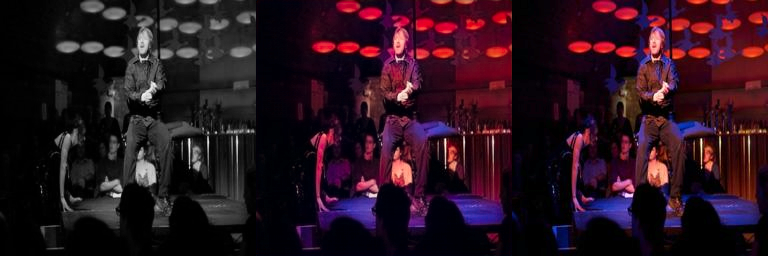

51: (D: loss = 5.094056e-21, acc = 1.0), (A: loss = 15770.363, 0.0, acc = 1.0)
52: (D: loss = 3.5724544e-17, acc = 1.0), (A: loss = 14759.994, 0.0, acc = 1.0)
53: (D: loss = 1.3605176e-21, acc = 1.0), (A: loss = 18366.912, 0.0, acc = 1.0)
54: (D: loss = 1.7591898e-18, acc = 1.0), (A: loss = 14750.038, 0.0, acc = 1.0)
55: (D: loss = 1.0411994e-21, acc = 1.0), (A: loss = 16823.002, 2.8248994e-38, acc = 1.0)
56: (D: loss = 6.949839e-20, acc = 1.0), (A: loss = 21366.922, 0.0, acc = 1.0)
57: (D: loss = 1.9462873e-16, acc = 1.0), (A: loss = 13235.753, 0.0, acc = 1.0)
58: (D: loss = 1.6951453e-20, acc = 1.0), (A: loss = 14244.994, 0.0, acc = 1.0)
59: (D: loss = 1.3130777e-21, acc = 1.0), (A: loss = 16202.772, 0.0, acc = 1.0)
60: (D: loss = 9.8816973e-20, acc = 1.0), (A: loss = 13104.498, 5.0660854e-37, acc = 1.0)
61: (D: loss = 1.9600715e-18, acc = 1.0), (A: loss = 19389.127, 2.7155012e-36, acc = 1.0)
62: (D: loss = 1.428182e-22, acc = 1.0), (A: loss = 22995.207, 0.0, acc = 1.0)
63: (D: loss 

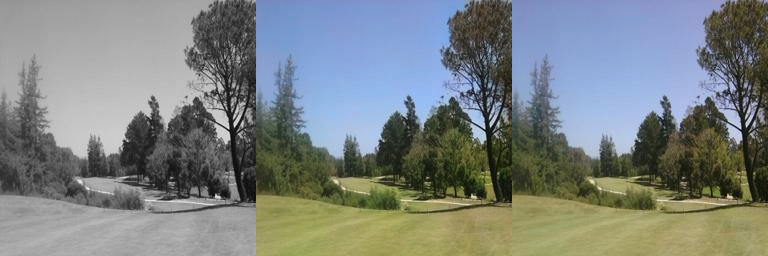

101: (D: loss = 1.0715025e-14, acc = 1.0), (A: loss = 19267.354, 6.2002076e-38, acc = 1.0)
102: (D: loss = 1.6488378e-21, acc = 1.0), (A: loss = 20201.803, 0.0, acc = 1.0)
103: (D: loss = 3.3845383e-21, acc = 1.0), (A: loss = 12842.547, 0.0, acc = 1.0)
104: (D: loss = 5.8941727e-24, acc = 1.0), (A: loss = 20145.637, 0.0, acc = 1.0)
105: (D: loss = 4.015087e-18, acc = 1.0), (A: loss = 14474.554, 8.529313e-34, acc = 1.0)
106: (D: loss = 1.765648e-19, acc = 1.0), (A: loss = 22098.3, 0.0, acc = 1.0)
107: (D: loss = 4.5580954e-20, acc = 1.0), (A: loss = 16519.793, 0.0, acc = 1.0)
108: (D: loss = 3.5892643e-21, acc = 1.0), (A: loss = 12497.735, 0.0, acc = 1.0)
109: (D: loss = 2.5681149e-23, acc = 1.0), (A: loss = 17709.166, 0.0, acc = 1.0)
110: (D: loss = 3.57234e-22, acc = 1.0), (A: loss = 21297.04, 0.0, acc = 1.0)
111: (D: loss = 1.9675418e-24, acc = 1.0), (A: loss = 21508.332, 0.0, acc = 1.0)
112: (D: loss = 4.2922174e-23, acc = 1.0), (A: loss = 16637.158, 0.0, acc = 1.0)
113: (D: loss = 

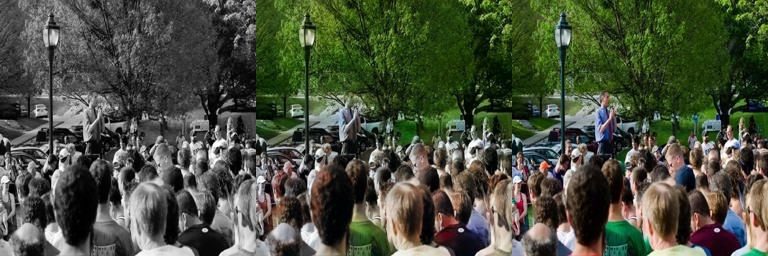

151: (D: loss = 2.9743223e-18, acc = 1.0), (A: loss = 21423.984, 0.0, acc = 1.0)
152: (D: loss = 4.2851497e-20, acc = 1.0), (A: loss = 16002.081, 0.0, acc = 1.0)
153: (D: loss = 2.3181283e-24, acc = 1.0), (A: loss = 15884.003, 0.0, acc = 1.0)
154: (D: loss = 3.867566e-19, acc = 1.0), (A: loss = 18097.941, 0.0, acc = 1.0)
155: (D: loss = 7.6872893e-19, acc = 1.0), (A: loss = 20293.129, 5.8946976e-38, acc = 1.0)
156: (D: loss = 2.5108957e-23, acc = 1.0), (A: loss = 18050.98, 1.819637e-33, acc = 1.0)
157: (D: loss = 1.3888435e-22, acc = 1.0), (A: loss = 15468.141, 0.0, acc = 1.0)
158: (D: loss = 3.0702166e-21, acc = 1.0), (A: loss = 17888.883, 0.0, acc = 1.0)
159: (D: loss = 1.3972952e-24, acc = 1.0), (A: loss = 14928.913, 4.2390776e-37, acc = 1.0)
160: (D: loss = 3.9290562e-24, acc = 1.0), (A: loss = 19677.393, 0.0, acc = 1.0)
161: (D: loss = 9.7812665e-17, acc = 1.0), (A: loss = 16562.984, 0.0, acc = 1.0)
162: (D: loss = 1.1707874e-20, acc = 1.0), (A: loss = 21531.238, 0.0, acc = 1.0)
1

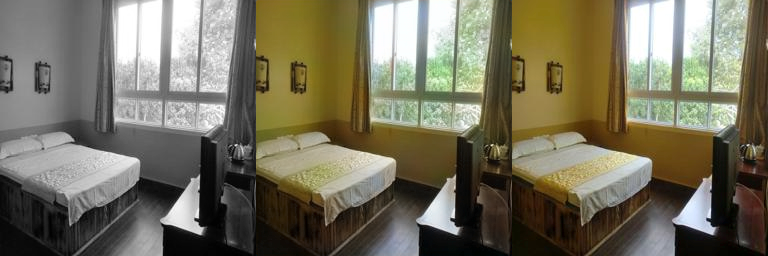

201: (D: loss = 7.103592e-22, acc = 1.0), (A: loss = 23548.639, 0.0, acc = 1.0)
202: (D: loss = 7.249767e-24, acc = 1.0), (A: loss = 16691.092, 2.0305915e-36, acc = 1.0)
203: (D: loss = 7.121487e-23, acc = 1.0), (A: loss = 18263.855, 0.0, acc = 1.0)
204: (D: loss = 7.0805435e-23, acc = 1.0), (A: loss = 22213.932, 0.0, acc = 1.0)
205: (D: loss = 2.5451202e-21, acc = 1.0), (A: loss = 20735.137, 0.0, acc = 1.0)
206: (D: loss = 1.3870654e-20, acc = 1.0), (A: loss = 16052.674, 0.0, acc = 1.0)
207: (D: loss = 1.4597327e-24, acc = 1.0), (A: loss = 22171.55, 0.0, acc = 1.0)
208: (D: loss = 2.9703099e-21, acc = 1.0), (A: loss = 12942.994, 0.0, acc = 1.0)
209: (D: loss = 2.8531117e-24, acc = 1.0), (A: loss = 16551.742, 0.0, acc = 1.0)
210: (D: loss = 2.5952503e-27, acc = 1.0), (A: loss = 17620.553, 0.0, acc = 1.0)
211: (D: loss = 7.453734e-23, acc = 1.0), (A: loss = 11472.217, 0.0, acc = 1.0)
212: (D: loss = 1.6898806e-23, acc = 1.0), (A: loss = 17712.951, 5.7276085e-38, acc = 1.0)
213: (D: loss

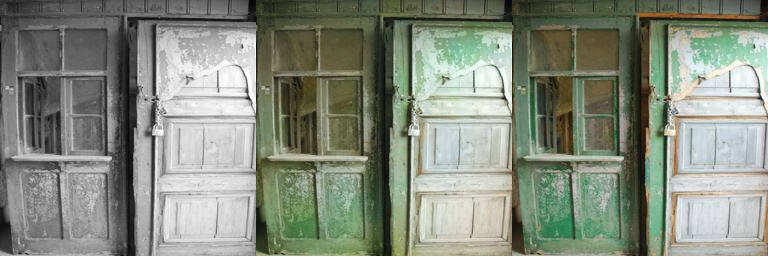

251: (D: loss = 1.2152871e-25, acc = 1.0), (A: loss = 17930.545, 0.0, acc = 1.0)
252: (D: loss = 3.666623e-22, acc = 1.0), (A: loss = 15116.082, 0.0, acc = 1.0)
253: (D: loss = 5.5072778e-24, acc = 1.0), (A: loss = 25427.602, 0.0, acc = 1.0)
254: (D: loss = 1.0822149e-20, acc = 1.0), (A: loss = 21349.416, 0.0, acc = 1.0)
255: (D: loss = 4.6959536e-23, acc = 1.0), (A: loss = 17254.924, 0.0, acc = 1.0)
256: (D: loss = 1.5386967e-24, acc = 1.0), (A: loss = 16344.891, 0.0, acc = 1.0)
257: (D: loss = 3.229905e-20, acc = 1.0), (A: loss = 17032.016, 0.0, acc = 1.0)
258: (D: loss = 2.6047487e-25, acc = 1.0), (A: loss = 12889.526, 2.7584415e-37, acc = 1.0)
259: (D: loss = 2.0607289e-20, acc = 1.0), (A: loss = 16100.624, 0.0, acc = 1.0)
260: (D: loss = 2.1522305e-19, acc = 1.0), (A: loss = 24195.992, 0.0, acc = 1.0)
261: (D: loss = 8.091302e-23, acc = 1.0), (A: loss = 17773.096, 0.0, acc = 1.0)
262: (D: loss = 6.681496e-22, acc = 1.0), (A: loss = 18309.836, 0.0, acc = 1.0)
263: (D: loss = 3.6878

KeyboardInterrupt: ignored

In [10]:
for i in range(10000):
  img_color=y_data[np.random.randint(0,20000, size=16)]
  img_gray=x_data[np.random.randint(0,20000, size=16)]
  img_gray=np.reshape(img_gray,[-1,256,256,1])
  img_fake=generator.predict(img_gray)
  x=np.concatenate((img_color, img_fake), axis=0)
  y=np.ones([16*2, 1])
  y[16:,:]=0
  make_trainable(discriminator, True)
  d_loss=discriminator.train_on_batch(x,y)
  
  y=np.ones([16,1])
  make_trainable(discriminator, False)
  rand=np.random.randint(0,20000, size=16)
  img_gray=x_data[rand]
  img_real=y_data[rand]
  img_gray=np.reshape(img_gray,[-1,256,256,1])
  a_loss=adversarial.train_on_batch(img_gray, [img_real ,y])
  print(str(i)+": (D: loss = "+str(d_loss[0])+", acc = "+str(d_loss[1])+
        "), (A: loss = "+str(a_loss[0])+", "+str(a_loss[2])+", acc = "+str(a_loss[4])+")")
  if (i%50==0) and (i!=0):
    generator.save_weights("/content/drive/My Drive/ToMau_GAN/generator.h5")
    model.D.save_weights("/content/drive/My Drive/ToMau_GAN/discriminator.h5")
    show(x_data, y_data, generator)

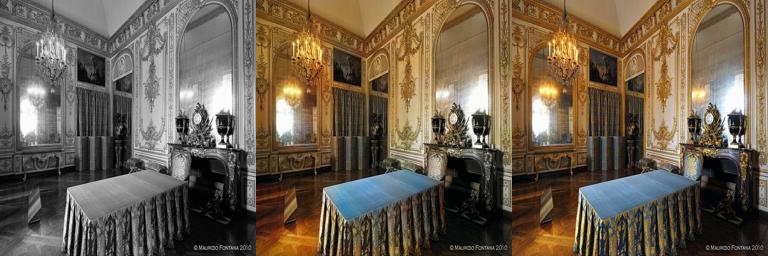

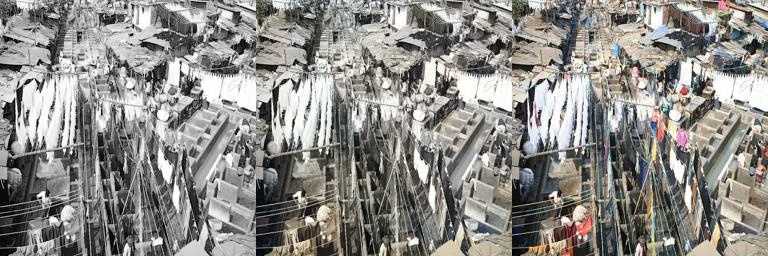

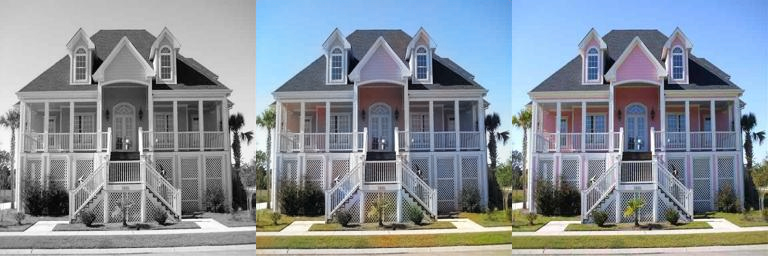

In [17]:
show(x_data, y_data, generator)
show(x_data, y_data, generator)
show(x_data, y_data, generator)

In [0]:
generator.save_weights("/content/drive/My Drive/ToMau_GAN/generator.h5")
model.D.save_weights("/content/drive/My Drive/ToMau_GAN/discriminator.h5")

In [0]:
"""model_json = generator.to_json()
with open("/content/drive/My Drive/ToMau_GAN/generator.json", "w") as json_file:
    json_file.write(model_json)"""